# Linear Model Implementation

Andrew Chung, hc893

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from matplotlib import pyplot as plt
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

## Import Data, Fit Ordinary Least Squares (OLS)

Ordinary Least Squares Linear Model: $\mathbf{y} = \mathbf{Xb} + \mathbf{\epsilon}$

### Run OLS Model

In [17]:
data = pd.read_csv("subwaydata.csv").iloc[:, 1:]  # remove unlabelled index column
X = data.iloc[:, 3:]
Xc = sm.add_constant((X - X.mean())/X.std()) # center and scale, add constant term
y = data['ridership'].to_numpy()/1000 # scale to 1K

# ensure that X and y are equal in size
assert X.shape[0] == y.size, "Incompatible X and y dimensions"

In [18]:
ols = sm.OLS(y, Xc).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     33.38
Date:                Mon, 12 May 2025   Prob (F-statistic):           4.29e-37
Time:                        16:28:20   Log-Likelihood:                -1189.0
No. Observations:                 184   AIC:                             2402.
Df Residuals:                     172   BIC:                             2441.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          230.3801     11.814     19.501      0.000     207.062     253.699
additional_platform_time        15.8088    118.130      0.134      0.894    -217.363     248.981
additional_train_time           24.3182     33.852      0.718      0.474     -42.500      91.137
over_five_mins_perc           -158.3951    119.469     -1.326      0.187    -394.208      77.418
wait_assessment                439.1615    352.363      1.246      0.214    -256.350    1134.673
service_delivered            -1320.9419    576.129     -2.293      0.023   -2458.136    -183.748
terminal_on_time_performance  1011.8539    263.836      3.835      0.000     491.080    1532.628
percent_late                    35.6695     43.941      0.812      0.418     -51.063     122.402
infra_critical                 -21.1981     38.491     -0.551      0.583     -97.174      54.778
noninfra_critical               47.3039     25.462      1.858      0.065      -2.954      97.562
infra_noncritical              190.3450     73.793      2.579      0.011      44.689     336.001
noninfra_noncritical           -23.0898     55.642     -0.415      0.679    -132.919      86.739
==============================================================================
Omnibus:                       75.617   Durbin-Watson:                   1.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.635
Skew:                           1.430   Prob(JB):                     3.76e-93
Kurtosis:                       9.880   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual Diagnostics

1. Residuals vs. Fitted 
2. Q-Q Plot
3. Scale-Location Plot
4. Residuals vs. Leverage

Text(0, 0.5, 'Standardized Residuals')

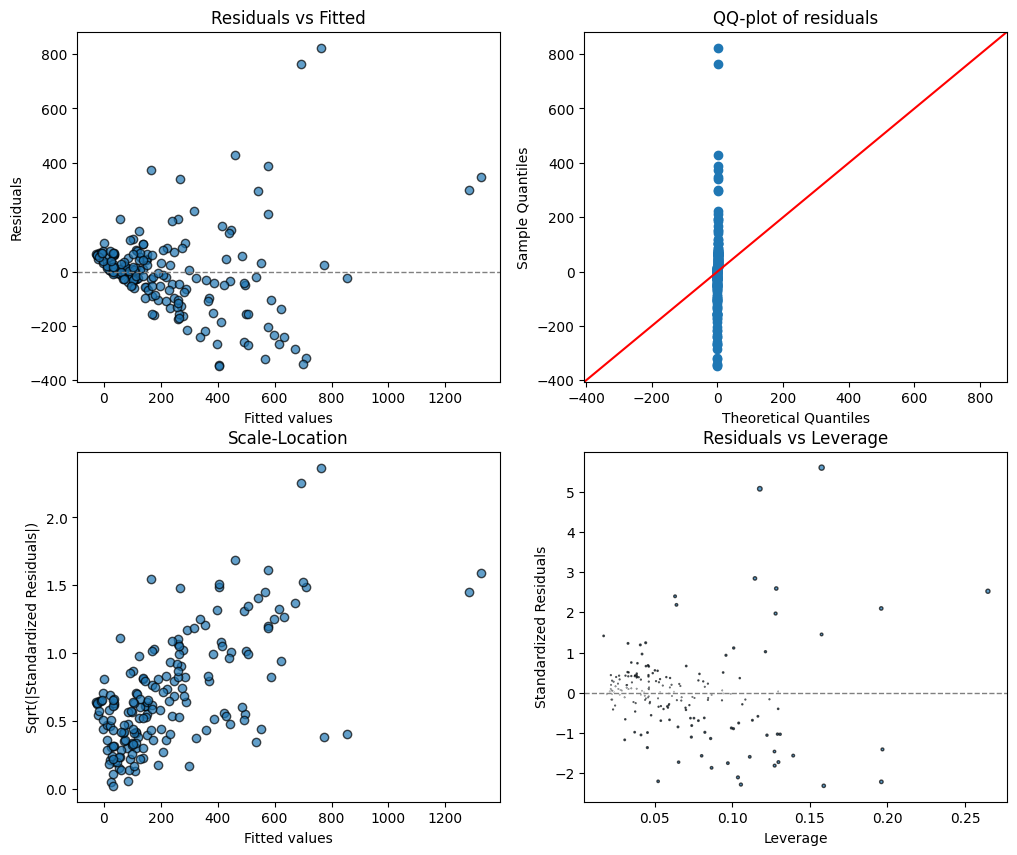

In [19]:
# Extract values
fitted = ols.fittedvalues
resid = ols.resid
influence = ols.get_influence()
std_resid = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag
cooks = influence.cooks_distance[0]

fig, axs = plt.subplots(2, 2, figsize = (12, 10))

# 1. Residuals vs. Fitted
axs[0, 0].scatter(fitted, resid, edgecolor = 'k', alpha = 0.7)
axs[0, 0].axhline(0, color='grey', linestyle='--', linewidth=1)
axs[0, 0].set_title('Residuals vs Fitted')
axs[0, 0].set_xlabel('Fitted values')
axs[0, 0].set_ylabel('Residuals')

# 2. QQ-plot of residuals
sm.qqplot(resid, line='45', ax=axs[0, 1])
axs[0, 1].set_title('QQ-plot of residuals')

# 3. Scale-Location plot
axs[1, 0].scatter(fitted, np.sqrt(np.abs(std_resid)), edgecolor='k', alpha=0.7)
axs[1, 0].set_title('Scale-Location')
axs[1, 0].set_xlabel('Fitted values')
axs[1, 0].set_ylabel('Sqrt(|Standardized Residuals|)')

# 4. Residuals vs Leverage
scatter = axs[1, 1].scatter(leverage, std_resid, s=20 * np.sqrt(cooks), edgecolor='k', alpha=0.7)
axs[1, 1].axhline(0, color='grey', linestyle='--', linewidth=1)
axs[1, 1].set_title('Residuals vs Leverage')
axs[1, 1].set_xlabel('Leverage')
axs[1, 1].set_ylabel('Standardized Residuals')

In [15]:
ols = sm.OLS(np.log(y), Xc).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     32.90
Date:                Mon, 12 May 2025   Prob (F-statistic):           9.75e-37
Time:                        14:58:42   Log-Likelihood:                -152.96
No. Observations:                 184   AIC:                             329.9
Df Residuals:                     172   BIC:                             368.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            4.9498      0.042    116.833      0.000       4.866       5.033
additional_platform_time         0.6534      0.424      1.542      0.125      -0.183       1.490
additional_train_time            0.0010      0.121      0.008      0.994      -0.239       0.241
over_five_mins_perc             -1.2507      0.428     -2.919      0.004      -2.096      -0.405
wait_assessment                 -2.0460      1.264     -1.619      0.107      -4.540       0.448
service_delivered                1.9869      2.066      0.962      0.338      -2.091       6.065
terminal_on_time_performance     0.9918      0.946      1.048      0.296      -0.876       2.859
percent_late                     0.1983      0.158      1.258      0.210      -0.113       0.509
infra_critical                  -0.0625      0.138     -0.453      0.651      -0.335       0.210
noninfra_critical                0.2555      0.091      2.799      0.006       0.075       0.436
infra_noncritical                0.2959      0.265      1.118      0.265      -0.227       0.818
noninfra_noncritical            -0.2083      0.200     -1.044      0.298      -0.602       0.186
==============================================================================
Omnibus:                        5.765   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                3.449
Skew:                           0.130   Prob(JB):                        0.178
Kurtosis:                       2.382   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""